# Text Mining and  Web Scraping
> Bagas Wibowo - 2023

## Install Aplikasi Pendukung

* EmEditor (https://www.emeditor.com/#download) untuk big data text editor
* Anaconda (https://www.anaconda.com/download/) untuk platform Data Science berbasis Python
* Power BI Desktop (https://powerbi.microsoft.com/en-us/downloads/) untuk ETL Tools dan Visualisasi
* WebScraper (https://www.webscraper.io/) untuk scrape data web menggunakan extension (plugin) di browser
* Visual Studio Code (https://code.visualstudio.com/download) untuk editor kode pemrograman

## Scrape dengan menggunakan Web Scraper

`#Sitemap artikel detik`

```
{"_id":"artikel_detik","startUrl":["https://www.detik.com/edu/beasiswa/d-7010598/awardee-bongkar-3-rahasia-dapat-beasiswa-lpdp-intip-yuk"],"selectors":[{"id":"artikel","parentSelectors":["_root"],"type":"SelectorElement","selector":"div.column-8","multiple":true},{"id":"judul","parentSelectors":["artikel"],"type":"SelectorText","selector":"h1","multiple":false,"regex":""},{"id":"author","parentSelectors":["artikel"],"type":"SelectorText","selector":"div.detail__author","multiple":false,"regex":""},{"id":"tanggal","parentSelectors":["artikel"],"type":"SelectorText","selector":"div.detail__date","multiple":false,"regex":""},{"id":"gambar_utama","parentSelectors":["artikel"],"type":"SelectorImage","selector":"img.p_img_zoomin","multiple":false},{"id":"konten","parentSelectors":["artikel"],"type":"SelectorText","selector":"div.detail__body-text","multiple":false,"regex":""}]}
```

`#Sitemap hasil pencarian detik`

```
{"_id":"cari_info_detik","startUrl":["https://www.detik.com/search/searchall?query=lpdp&siteid=117"],"selectors":[{"id":"daftar_pencarian","parentSelectors":["halaman_pencarian"],"type":"SelectorElement","selector":"div.list","multiple":true},{"id":"link_hasil_pencarian","parentSelectors":["daftar_pencarian"],"type":"SelectorLink","selector":"> article a","multiple":true,"linkType":"linkFromHref"},{"id":"judul","parentSelectors":["link_hasil_pencarian"],"type":"SelectorText","selector":"h1","multiple":false,"regex":""},{"id":"author","parentSelectors":["link_hasil_pencarian"],"type":"SelectorText","selector":"div.detail__author","multiple":false,"regex":""},{"id":"tanggal","parentSelectors":["link_hasil_pencarian"],"type":"SelectorText","selector":"div.detail__date","multiple":false,"regex":""},{"id":"image","parentSelectors":["link_hasil_pencarian"],"type":"SelectorImage","selector":"img.p_img_zoomin","multiple":false},{"id":"konten","parentSelectors":["link_hasil_pencarian"],"type":"SelectorText","selector":"div.detail__body-text","multiple":false,"regex":""},{"id":"halaman_pencarian","parentSelectors":["_root","halaman_pencarian"],"paginationType":"auto","selector":".paging a","type":"SelectorPagination"}]}
```

`#Sitemap hasil pencarian google scholar`

```
{"_id":"google_scholar","startUrl":["https://scholar.google.com/scholar?hl=en&as_sdt=0%2C5&as_ylo=2023&as_yhi=2023&q=kecerdasan+buatan+untuk+deteksi+penyakit+hewan&btnG="],"selectors":[{"id":"halaman_pencarian","parentSelectors":["_root","halaman_pencarian"],"paginationType":"auto","selector":"td:nth-of-type(n+3) a","type":"SelectorPagination"},{"id":"list_pencarian","parentSelectors":["halaman_pencarian"],"type":"SelectorElement","selector":"div#gs_bdy_ccl","multiple":true},{"id":"judul","parentSelectors":["hasil_pencarian"],"type":"SelectorText","selector":".gs_rt a","multiple":false,"regex":""},{"id":"excerpt","parentSelectors":["hasil_pencarian"],"type":"SelectorText","selector":"div.gs_rs","multiple":false,"regex":""},{"id":"author","parentSelectors":["hasil_pencarian"],"type":"SelectorText","selector":"div.gs_a","multiple":false,"regex":""},{"id":"hasil_pencarian","parentSelectors":["list_pencarian"],"type":"SelectorElement","selector":"div.gs_or","multiple":true},{"id":"link_pencarian","parentSelectors":["hasil_pencarian"],"type":"SelectorLink","selector":"a","multiple":false,"linkType":"linkFromHref"}]}
```

# Scrape dengan menggunakan Power BI Desktop

`#URL Laporan Kinerja DJP 2022`
 ```
 https://pajak.go.id/sites/default/files/2023-02/Laporan%20Kinerja%20DJP%202022.pdf
 ```

`#Kode Power Query`
 ```
 let
     Source = Pdf.Tables(Web.Contents("https://pajak.go.id/sites/default/files/2023-02/Laporan%20Kinerja%20DJP%202022.pdf"), [Implementation="1.3"]),
     Table057 = Source{[Id="Table057"]}[Data],
     #"Promoted Headers" = Table.PromoteHeaders(Table057, [PromoteAllScalars=true]),
     #"Filtered Rows" = Table.SelectRows(#"Promoted Headers", each ([#"No."] <> null) and ([#"Kelompok#(lf)Pajak"] <> null)),
     #"Changed Type" = Table.TransformColumnTypes(#"Filtered Rows",{{"Target#(lf)2022", type number}, {"2021", type number}, {"2022", type number}, {"%#(lf)Growth", type number}, {"%#(lf)Growth_1", type number}, {"%#(lf)Penc.", type number}, {"%#(lf)Penc._2", type number}})
 in
    #"Changed Type"
```

# Scrape dengan menggunakan Python


In [ ]:
import pandas
import os
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

def sedotUmkm(url,setProvinsi,setKabupaten,setNama,pageSize,destinationDir):

    options=Options()
    options.add_argument("disable-infobars")
    options.add_argument("disable-extensions")
    options.add_argument("disable-blink-features=AutomationControlled")
    options.add_argument("start-maximized")

    browser=webdriver.Chrome(options=options)

    browser.get(url)
    provinsi=browser.find_element(By.NAME,"ctl00$MainContent$DropDownList1")
    provinsi.send_keys(setProvinsi)
    kabupaten=browser.find_element(By.NAME,"ctl00$MainContent$DropDownList2")
    kabupaten.send_keys(setKabupaten)
    nama=browser.find_element(By.NAME,"ctl00$MainContent$TextBox1")
    nama.send_keys(setNama)
    submit=browser.find_element(By.NAME,"ctl00$MainContent$Button1")
    submit.click()

    result=int(browser.find_element(By.XPATH,"//*[@id='MainContent_DetailsView1']/tbody/tr/td[2]").text)

    pages=list(range(2,int(result / pageSize) + 2))

    def collectUrl(activeBrowser,targetUrls):
        links=activeBrowser.find_elements(By.TAG_NAME,"a")
        for link in links:
            hrefUrl=link.get_attribute("href")
            if(str(hrefUrl).startswith("https://umkm.depkop.go.id/Detail.aspx?KoperasiId=")):
                targetUrls.append(hrefUrl)
        return targetUrls

    umkmUrls=[]
    umkmUrls=collectUrl(browser,umkmUrls)

    for page in pages:
        if(page%10 == 1):
            nextPage=browser.find_elements(By.LINK_TEXT,"...")[1]
        else:
            nextPage=browser.find_element(By.LINK_TEXT,str(page))
        nextPage.click()
        umkmUrls=collectUrl(browser,umkmUrls)
    print(umkmUrls)

    def storeTable(activeBrowser,destinationDir,fileName):
        table=activeBrowser.find_element(By.TAG_NAME,"table").get_attribute("outerHTML")
        table=pandas.read_html(table,skiprows=0,header=0)[0]
        dfTable=pandas.DataFrame(table)

        if(destinationDir is None):
            print(dfTable)
        else:
            if(os.path.exists(destinationDir) is False):
                os.makedirs(destinationDir)
            targetName=fileName + ".tsv"
            dfTable.to_csv(destinationDir + os.sep + targetName,index=False,sep="\t")

    for umkmUrl in umkmUrls:
        fileName=str(umkmUrl).split("=")[1]
        browser.get(umkmUrl)
        storeTable(browser,destinationDir,fileName)

url="https://umkm.depkop.go.id/"
provinsi="DKI Jakarta"
kota="Kota Jakarta Selatan"
kriteria="bengkel mobil"
pageSize=20
folder_simpan="C:\\repositories\\TextMining\\hasil_scraping\\python\\umkm"

sedotUmkm(url,provinsi,kota,kriteria,pageSize,folder_simpan)


## TEXT MINING

## Ekstrak data dari file CSV

In [ ]:
import pandas as pd

#buka dataset dari file CSV dengan menggunakan Pandas
file_sumber="./hasil_scraping/webscraper/artikel_detik.csv"
csvDataFrame=pd.read_csv(file_sumber)
csvDataFrame

In [ ]:
kontenDataFrame=csvDataFrame["konten"]
kontenDataFrame

In [ ]:
konten=kontenDataFrame[0]
print(konten)

## Ekstrak data dari file PDF

In [6]:
from pypdf import PdfReader

reader = PdfReader("./sumber_data/Awardee Bongkar 3 Rahasia Dapat Beasiswa LPDP.pdf")
konten = ""
for page in reader.pages:
    konten += page.extract_text() + "\n"
print(konten)

Awardee Bongkar 3 Rahasia Dapat 
Beasiswa LPDP, Intip Yuk!  
Nikita Rosa - detikEdu  
Senin, 30 Okt 2023 21:00 WIB  
 
 
Jakarta - Margaret Ayu Caroline bertolak ke Inggris untuk melanjutkan studi di University College 
London (UCL) . Alumnus Fakultas Kedokteran Universitas Airlangga itu berangkat ke London dengan 
beasiswa Lembaga Pengelola Dana Pendidikan (LPDP) Kementerian Keuangan . Oline, panggilan 
akrabnya, menceritakan bahwa keinginan untuk melanjutkan kuliah berasal dari cita -citanya sebagai 
seorang dosen klinis . Baca juga: 3 Tips Persiapan Daftar S2 di Luar Negeri untuk Pekerja, Catat 
Nih!Baca juga: Sosok Dhani, Dokter Gigi Disabilitas Peraih Beasiswa LPDP ke Jerman ”Aku punya cita -
cita ingin jadi dosen klinis, karena aku tertarik menjadi seorang pengajar, ” katanya dalam laman Unair 
dikutip Senin (30/10/2023) .  

Ketertarikannya pada bidang ortopedi membuat Oline memilih Master of Science (MSc) 
Musculoskeletal Science and Medical Engineering sebagai jurusannya . Ia 

## Cleansing Data dengan Regex

In [7]:
import re

#buang semua non alphanumeric, spasi dan titik
konten_clean=re.sub(r"[^A-Za-z0-9\s.]","",konten)

#ubah semua multi-spasi menjadi single spasi
konten_clean=re.sub(r"[\s]+"," ",konten_clean)

#ubah semua spasi sebelum titik
konten_clean=re.sub(r"[\s][.]",".",konten_clean)
print(konten_clean)

Awardee Bongkar 3 Rahasia Dapat Beasiswa LPDP Intip Yuk Nikita Rosa detikEdu Senin 30 Okt 2023 2100 WIB Jakarta Margaret Ayu Caroline bertolak ke Inggris untuk melanjutkan studi di University College London UCL. Alumnus Fakultas Kedokteran Universitas Airlangga itu berangkat ke London dengan beasiswa Lembaga Pengelola Dana Pendidikan LPDP Kementerian Keuangan. Oline panggilan akrabnya menceritakan bahwa keinginan untuk melanjutkan kuliah berasal dari cita citanya sebagai seorang dosen klinis. Baca juga 3 Tips Persiapan Daftar S2 di Luar Negeri untuk Pekerja Catat NihBaca juga Sosok Dhani Dokter Gigi Disabilitas Peraih Beasiswa LPDP ke Jerman Aku punya cita cita ingin jadi dosen klinis karena aku tertarik menjadi seorang pengajar katanya dalam laman Unair dikutip Senin 30102023. Ketertarikannya pada bidang ortopedi membuat Oline memilih Master of Science MSc Musculoskeletal Science and Medical Engineering sebagai jurusannya. Ia memilih UCL karena telah bermitra dengan salah satu rumah s

## Remove Stopwords

In [8]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import re

def getStopWords(customList=None,listFilePath=None):
        #mendapatkan default stopwords bahasa Indonesia
        factory = StopWordRemoverFactory()
        stopwords = factory.get_stop_words()

        #menambahkan daftar stopwords custom
        if(customList is not None):
            my_additional_stop_words=customList
        else:
            my_additional_stop_words=[]
        if(listFilePath is not None):
            with open(listFilePath) as f:
                for line in f :
                    my_additional_stop_words += [line[:-1]]
        all_stopwords = stopwords + my_additional_stop_words

        return all_stopwords
def removeStopWords(sentence, stop_words):
    words = sentence.split()
    return ' '.join([word for word in words if word.lower() not in stop_words])

konten_clean_from_stopwords=removeStopWords(konten_clean,getStopWords())
print(konten_clean_from_stopwords)

Awardee Bongkar 3 Rahasia Beasiswa LPDP Intip Yuk Nikita Rosa detikEdu Senin 30 Okt 2023 2100 WIB Jakarta Margaret Ayu Caroline bertolak Inggris melanjutkan studi University College London UCL. Alumnus Fakultas Kedokteran Universitas Airlangga berangkat London beasiswa Lembaga Pengelola Dana Pendidikan LPDP Kementerian Keuangan. Oline panggilan akrabnya menceritakan keinginan melanjutkan kuliah berasal cita citanya seorang dosen klinis. Baca 3 Tips Persiapan Daftar S2 Luar Negeri Pekerja Catat NihBaca Sosok Dhani Dokter Gigi Disabilitas Peraih Beasiswa LPDP Jerman Aku punya cita cita jadi dosen klinis aku tertarik menjadi seorang pengajar katanya laman Unair dikutip Senin 30102023. Ketertarikannya bidang ortopedi membuat Oline memilih Master of Science MSc Musculoskeletal Science and Medical Engineering jurusannya. memilih UCL bermitra salah satu rumah sakit ortopedi terbaik dunia. mahasiswa berminat beasiswa LPDP Oline membongkar rahasianya. Yuk simak berikut ini. Rahasia Beasiswa LPD

## Tokenizer dan Stemmer

In [9]:
modelName="indobenchmark/indobert-base-p1"

from transformers import AutoTokenizer,AutoModel,pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
model=AutoModel.from_pretrained(modelName)
tokenizer=AutoTokenizer.from_pretrained(modelName)

def stemmer():
    # Inisialisasi stemmer
    factory=StemmerFactory()
    stemmerAgent=factory.create_stemmer()
    return stemmerAgent

stemmer=stemmer()

In [10]:
def stemFromText(stemmer,text):
    stemmedText=stemmer.stem(text)
    return stemmedText

stemText=stemFromText(stemmer,konten_clean_from_stopwords)
print(stemText)

awardee bongkar 3 rahasia beasiswa lpdp intip yuk nikita rosa detikedu senin 30 okt 2023 2100 wib jakarta margaret ayu caroline tolak inggris lanjut studi university college london ucl alumnus fakultas dokter universitas airlangga berangkat london beasiswa lembaga kelola dana didik lpdp menteri uang oline panggil akrab cerita ingin lanjut kuliah asal cita cita orang dosen klinis baca 3 tips siap daftar s2 luar negeri kerja catat nihbaca sosok dhani dokter gigi disabilitas raih beasiswa lpdp jerman aku punya cita cita jadi dosen klinis aku tarik jadi orang ajar kata laman unair kutip senin 30102023 tari bidang ortopedi buat oline pilih master of science msc musculoskeletal science and medical engineering jurus pilih ucl mitra salah satu rumah sakit ortopedi baik dunia mahasiswa minat beasiswa lpdp oline bongkar rahasia yuk simak ikut ini rahasia beasiswa lpdp 1 tentu alas oline segala proses jalan baik bila motivasi kuat bahkan oline butuh waktu cukup lama tentu alas kuat milik putus da

In [11]:
def tokenFromText(pretrainedTokenizer,text):
    tokens=pretrainedTokenizer.tokenize(text)
    return tokens

tokens=tokenFromText(tokenizer,konten_clean_from_stopwords)
print(tokens)

['award', '##ee', 'bongkar', '3', 'rahasia', 'beasiswa', 'lp', '##dp', 'intip', 'yuk', 'nikita', 'rosa', 'detik', '##edu', 'senin', '30', 'okt', '202', '##3', '2100', 'wib', 'jakarta', 'margar', '##et', 'ayu', 'carol', '##ine', 'bertolak', 'inggris', 'melanjutkan', 'studi', 'university', 'college', 'london', 'uc', '##l', '.', 'alumnus', 'fakultas', 'kedokteran', 'universitas', 'airlangga', 'berangkat', 'london', 'beasiswa', 'lembaga', 'pengelola', 'dana', 'pendidikan', 'lp', '##dp', 'kementerian', 'keuangan', '.', 'oli', '##ne', 'panggilan', 'akrab', '##nya', 'menceritakan', 'keinginan', 'melanjutkan', 'kuliah', 'berasal', 'cita', 'cita', '##nya', 'seorang', 'dosen', 'klinis', '.', 'baca', '3', 'tips', 'persiapan', 'daftar', 's', '##2', 'luar', 'negeri', 'pekerja', 'catat', 'nih', '##baca', 'sosok', 'dhani', 'dokter', 'gigi', 'disabilitas', 'peraih', 'beasiswa', 'lp', '##dp', 'jerman', 'aku', 'punya', 'cita', 'cita', 'jadi', 'dosen', 'klinis', 'aku', 'tertarik', 'menjadi', 'seorang', '

## Sentiment Analysis

In [19]:
def sentimentAnalyzer(modelName):
    nlp=pipeline(
        "sentiment-analysis",
        model=modelName,
        tokenizer=modelName
    )
    return nlp

def sentimentAnalysis(sentimentAnalyzer,text):
    result=sentimentAnalyzer(text)
    return result

sentimentAnalysisModelName="w11wo/indonesian-roberta-base-sentiment-classifier"
sentimentAnalyzer=sentimentAnalyzer(sentimentAnalysisModelName)

textPositif="Aku sangat senang sekali belajar hal baru seperti NLP"
sentimentAnaysisResult=sentimentAnalysis(sentimentAnalyzer,textPositif)
print(textPositif)
print(sentimentAnaysisResult)

textNegatif="Huh, susah banget sih belajar NLP"
sentimentAnaysisResult=sentimentAnalysis(sentimentAnalyzer,textNegatif)
print(textNegatif)
print(sentimentAnaysisResult)

sentimentAnaysisResult=sentimentAnalysis(sentimentAnalyzer,konten_clean_from_stopwords)
print(konten_clean_from_stopwords)
print(sentimentAnaysisResult)

Aku sangat senang sekali belajar hal baru seperti NLP
[{'label': 'positive', 'score': 0.9981694221496582}]
Huh, susah banget sih belajar NLP
[{'label': 'negative', 'score': 0.9986188411712646}]
Awardee Bongkar 3 Rahasia Beasiswa LPDP Intip Yuk Nikita Rosa detikEdu Senin 30 Okt 2023 2100 WIB Jakarta Margaret Ayu Caroline bertolak Inggris melanjutkan studi University College London UCL. Alumnus Fakultas Kedokteran Universitas Airlangga berangkat London beasiswa Lembaga Pengelola Dana Pendidikan LPDP Kementerian Keuangan. Oline panggilan akrabnya menceritakan keinginan melanjutkan kuliah berasal cita citanya seorang dosen klinis. Baca 3 Tips Persiapan Daftar S2 Luar Negeri Pekerja Catat NihBaca Sosok Dhani Dokter Gigi Disabilitas Peraih Beasiswa LPDP Jerman Aku punya cita cita jadi dosen klinis aku tertarik menjadi seorang pengajar katanya laman Unair dikutip Senin 30102023. Ketertarikannya bidang ortopedi membuat Oline memilih Master of Science MSc Musculoskeletal Science and Medical Eng

## POS Analysis

In [22]:
import malaya

def posAnalyzer(modelName):
    model=malaya.pos.transformer(model=modelName)
    return model

def posAnalysis(posAnalyzer,text):
    result=posAnalyzer.predict(text)
    return result

modelName="bert"
posAnalyzer=posAnalyzer(modelName)
posAnalysis=posAnalysis(posAnalyzer,konten_clean_from_stopwords)

print(posAnalysis)

[('Awardee', 'PROPN'), ('Bongkar', 'PROPN'), ('3', 'NUM'), ('Rahasia', 'PROPN'), ('Beasiswa', 'PROPN'), ('LPDP', 'PROPN'), ('Intip', 'PROPN'), ('Yuk', 'PROPN'), ('Nikita', 'PROPN'), ('Rosa', 'PROPN'), ('detikEdu', 'PROPN'), ('Senin', 'PROPN'), ('30', 'NUM'), ('Okt', 'PROPN'), ('2023', 'NUM'), ('2100', 'NUM'), ('WIB', 'PROPN'), ('Jakarta', 'PROPN'), ('Margaret', 'PROPN'), ('Ayu', 'PROPN'), ('Caroline', 'PROPN'), ('bertolak', 'VERB'), ('Inggris', 'PROPN'), ('melanjutkan', 'VERB'), ('studi', 'NOUN'), ('University', 'PROPN'), ('College', 'PROPN'), ('London', 'PROPN'), ('UCL', 'PROPN'), ('.', 'PUNCT'), ('Alumnus', 'PROPN'), ('Fakultas', 'PROPN'), ('Kedokteran', 'PROPN'), ('Universitas', 'PROPN'), ('Airlangga', 'PROPN'), ('berangkat', 'VERB'), ('London', 'PROPN'), ('beasiswa', 'PROPN'), ('Lembaga', 'PROPN'), ('Pengelola', 'PROPN'), ('Dana', 'PROPN'), ('Pendidikan', 'PROPN'), ('LPDP', 'PROPN'), ('Kementerian', 'PROPN'), ('Keuangan', 'PROPN'), ('.', 'PUNCT'), ('Oline', 'PROPN'), ('panggilan', 

## NER Analysis

In [26]:
def nerAnalyzer(modelName):
    # Load model NER tagging
    model=malaya.entity.transformer(model=modelName)
    return model

def nerAnalysis(nerAnalyzer,text):
    # Prediksi NER
    result=nerAnalyzer.predict(text)
    return result

modelName="xlnet"
nerAnalyzer=nerAnalyzer(modelName)
result=nerAnalysis(nerAnalyzer,konten_clean_from_stopwords)
print(result)

[('Awardee', 'OTHER'), ('Bongkar', 'OTHER'), ('3', 'OTHER'), ('Rahasia', 'OTHER'), ('Beasiswa', 'OTHER'), ('LPDP', 'OTHER'), ('Intip', 'OTHER'), ('Yuk', 'person'), ('Nikita', 'person'), ('Rosa', 'person'), ('detikEdu', 'person'), ('Senin', 'time'), ('30', 'time'), ('Okt', 'time'), ('2023', 'time'), ('2100', 'time'), ('WIB', 'time'), ('Jakarta', 'location'), ('Margaret', 'OTHER'), ('Ayu', 'person'), ('Caroline', 'OTHER'), ('bertolak', 'OTHER'), ('Inggris', 'location'), ('melanjutkan', 'OTHER'), ('studi', 'OTHER'), ('University', 'OTHER'), ('College', 'OTHER'), ('London', 'location'), ('UCL', 'OTHER'), ('.', 'OTHER'), ('Alumnus', 'person'), ('Fakultas', 'OTHER'), ('Kedokteran', 'OTHER'), ('Universitas', 'OTHER'), ('Airlangga', 'OTHER'), ('berangkat', 'OTHER'), ('London', 'location'), ('beasiswa', 'OTHER'), ('Lembaga', 'OTHER'), ('Pengelola', 'OTHER'), ('Dana', 'OTHER'), ('Pendidikan', 'OTHER'), ('LPDP', 'OTHER'), ('Kementerian', 'OTHER'), ('Keuangan', 'OTHER'), ('.', 'OTHER'), ('Oline', 

## WordCloud Analysis

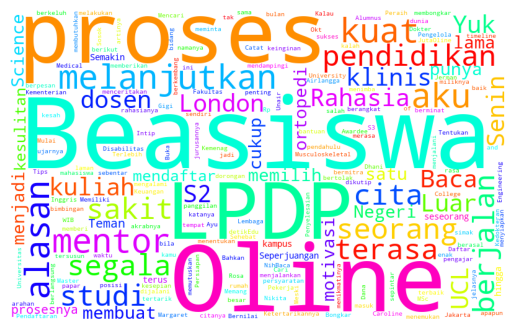

In [30]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

wc = WordCloud(background_color='white', colormap = 'gist_rainbow',
     stopwords = ['meta'], width = 800, height = 500).generate(konten_clean_from_stopwords)
plt.axis("off")
plt.imshow(wc)